













































# Lab 2: Logistic regression - Titanic

https://www.kaggle.com/c/titanic/data

In [3]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
import sklearn as sk

In [5]:
filename = 'titanic'

from urllib.request import urlretrieve
urlretrieve("https://bianchi.wp.imt.fr/files/2023/12/titanic.zip", filename + '.zip')

import os
zip_file = os.path.join(os.getcwd(), 'titanic.zip')

import zipfile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [6]:
df = pd.read_csv("traintitanic.csv")


In [7]:
# Using head(), info(), describe() etc. inspect the dataset. Which features are numerical, which ones are categorical? Comment about missing data.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 5 numerical features:
a) Age: Age of passsenger
b) Fare: Ticket Fare
c) SibSp: Number of siblings/spouses aboard
d) Parch: Number of parents/children aboard
e) Ticket: Ticket Number

There are 5 categorical features:
a) Sex: M/F
b) Cabin: Cabin Number
c) Embarked: C/Q/S
d) PClass: Ticket Class
e) Survival: 0/1

There is missing data for Age, Cabin and Embarked.
For Age, we can fill the missing data with the mean of the ages based on PClass and we can use PClass instead of Cabin in our model for similar purposes, and there is barely any data that's missing from Embarked column and we can simply drop those samples.

In [10]:
# Using the df.groupby("Pclass"), comment about the nature of the passengers as a function of the class ticket (first, second or third class)
df.groupby("Pclass").mean()

<ipython-input-10-80b3c51c2758>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Pclass").mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Here, passengers of the first class survived better and had a higher average fare and average age. The survival of the third class is comparatively very low. The average age and fare decreases from the first to third class.

<Axes: >

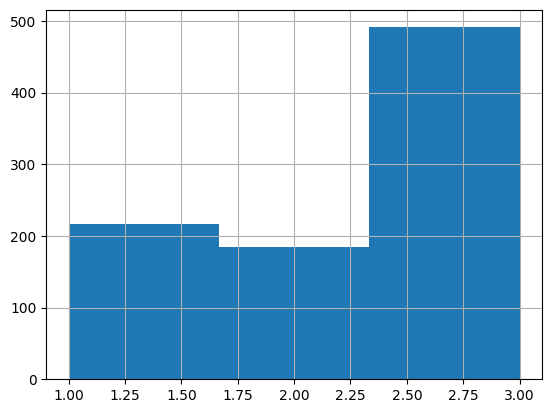

In [11]:
# Plot the histogram of Passenger's classes
df["Pclass"].hist(bins = 3)

In [12]:
# Comment about the impact of the sex of passengers
df.groupby("Sex").mean()

<ipython-input-12-39ad7f91a4f9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Sex").mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


According to the data, the 'female' passengers had a higher survival rate on average during the disaster. They also paid higher fare on average and had more siblings/spouses and were parents/had children higher than others on average.




In [13]:
# Comment about the impact of the embarkation city. How do you explain the discrepancies in survival rate?
df.groupby("Embarked").mean()

<ipython-input-13-751376c3c3a4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Embarked").mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


If a passenger embarked from port C, then they have a better Survival Rate, since they're more likely to be a 1st PClass Passenger. There is a correlation between Survival and Embarked but the cause could be several, but the Pclass disparity cause seems likely according to the data.

<Axes: >

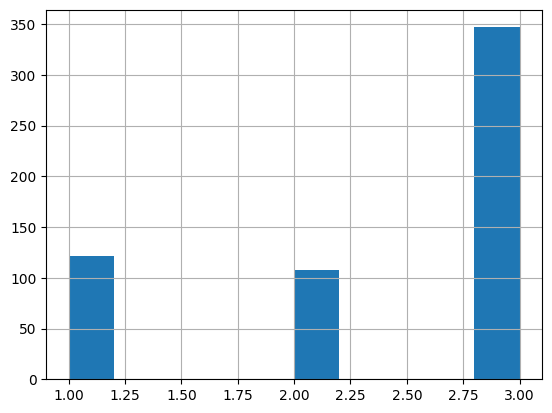

In [14]:
#Plot the histogram of the number of men in each class. Do the same for women. Comment.
df[df["Sex"]=="male"].Pclass.hist()

<Axes: >

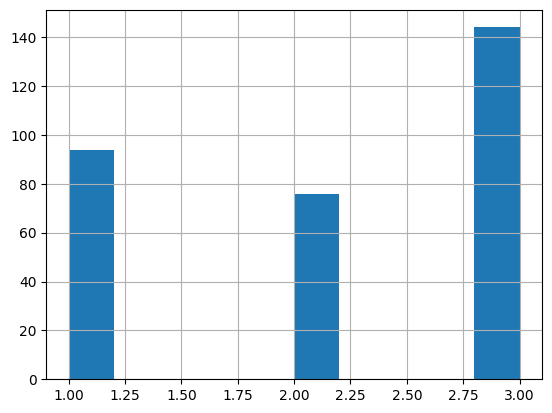

In [15]:
df[df["Sex"]=="female"].Pclass.hist()

There were way more men on board and in each individual class than women on board. About double the women.

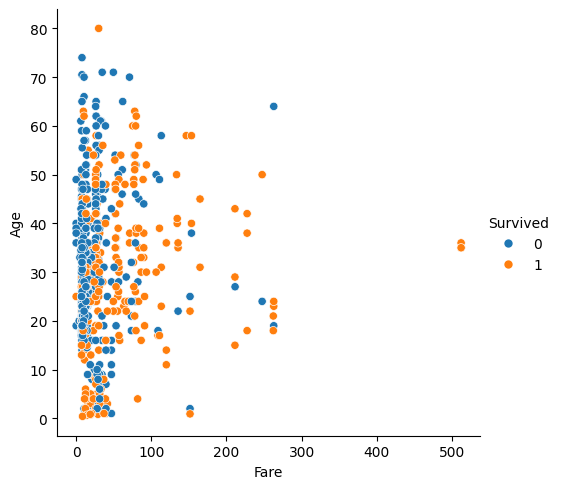

In [16]:
# Comment briefly the following code
sns.relplot(data=df,x="Fare", y="Age",hue="Survived")

The scatterplot of Age vs Fare shows how the person's survival was somehow related to their age and fare. A higher fare on average meant higher PClass and higher survival rate and same for very young people and people in their mid-life (such as 20-40). We can see that it's a good idea to consider these features in our model

<Axes: xlabel='Pclass', ylabel='Age'>

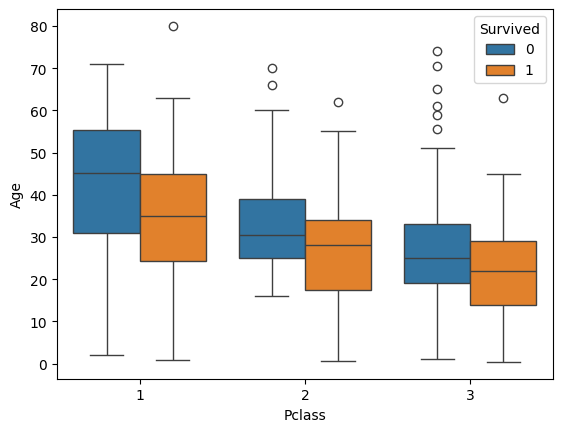

In [17]:
# In case you believe that other plots are interesting to vizualize the data set, you can provide them here.
sns.boxplot(x='Pclass', y='Age', data=df, hue="Survived")

A boxplot has more information in terms of average, range size and quartiles. The above boxplot is useful to compare passenger survival across age and pclasses. (It cleans up outliers)

# Categorical encoding

Certain columns (sex, embarked, etc.) are categorical. We need to transform them into numerical features.

In [18]:
# Create a new column "Sex_num" where the strings "male" and "female" are replaced by a binary integer.
df["Sex_num"] = (df["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column

In [19]:
# What is the following code doing?
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


This step is converting the "Embarked" column into 3 categorical columns with 0/1 values only.

In [20]:
# Using pd.get_dummies, create new columns in the dataframe df, one for each embarkation port
ports = pd.get_dummies(df['Embarked'])
df["Embarked_at_C"] = ports['C']
df["Embarked_at_Q"] = ports['Q']
df["Embarked_at_S"] = ports['S']

In [21]:
# We may drop the two columns "Sex" and "Embarked", as we now included their onehot counterparts in the dataframe. Check that the following code drops theses columns
copy_df = df.copy()
df.drop(columns=["Sex","Embarked"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,Embarked_at_C,Embarked_at_Q,Embarked_at_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


Not dropped!

In [22]:
# Use df.head(). Did the dropped column disappear? Solve possible issued using the argument inplace=True, in the drop method
df.head()
df.drop(columns=["Sex","Embarked"],inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,Embarked_at_C,Embarked_at_Q,Embarked_at_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


<ipython-input-24-9c62aa7c9f4a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

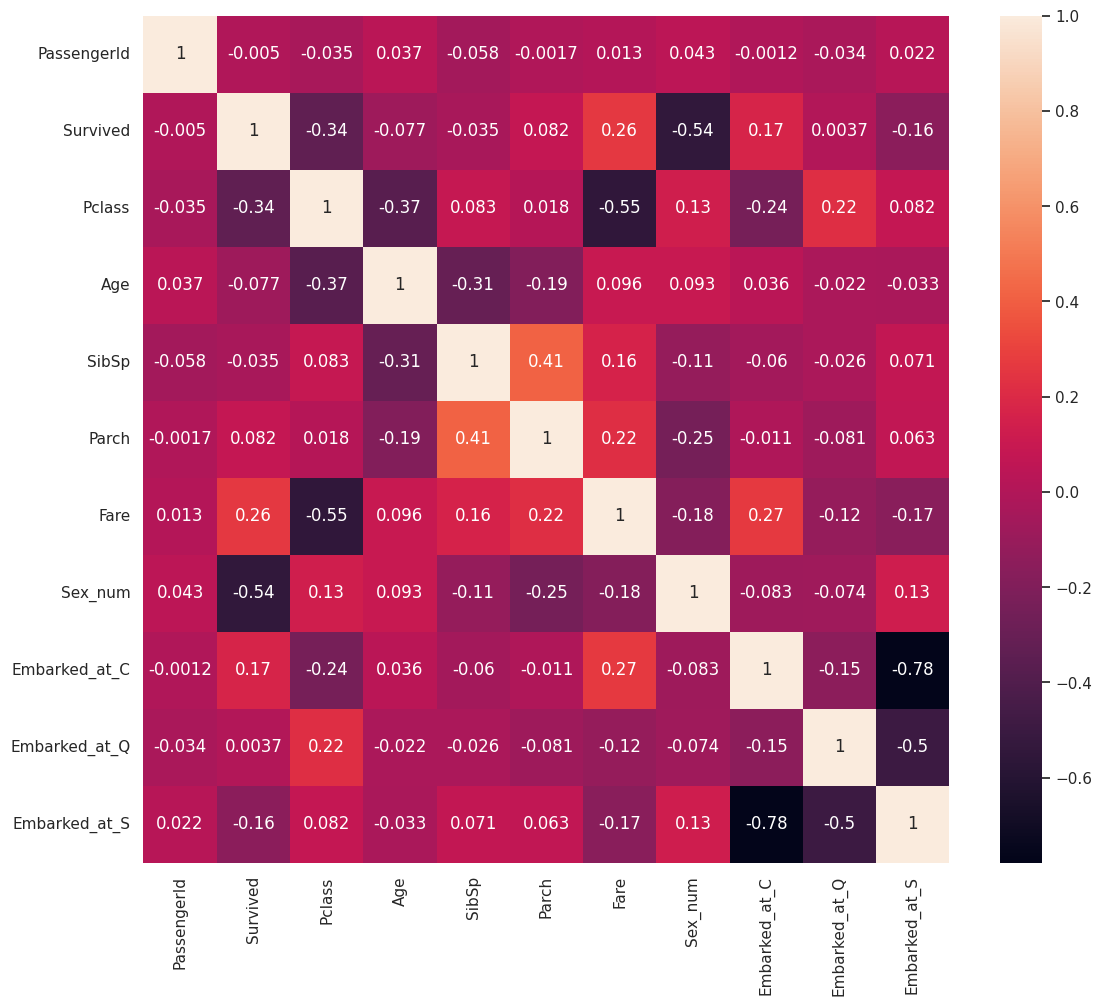

In [24]:
# What does the matrix df.corr() represent? Provide your interpretation of the numbers you see.
sns.set(rc = {'figure.figsize':(13,11)})
sns.heatmap(df.corr(),annot=True)

The matrix df.corr() represents the correlation coefficients between numerical columns in df. Each element in the matrix is the correlation between two columns. The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. The values range from -1 to 1.

There is strong relationships on average between
a) PClass and some Embarked locations
b) Survival and Fare
c) PClass and Fare
d) Age and Fare
e) Sex and Survival
and more.

My understanding of the numbers:
1: Perfect positive correlation. As one variable increases, the other also increases proportionally.
0: No correlation. There is no linear relationship between the two variables.
-1: Perfect negative correlation. As one variable increases, the other decreases proportionally.

# Data cleansing
Check the number of missing values in "Age". You can either


*   Do nothing (the rows with missing "Age" will be ignored in the training stage)
*   Or fill the missing values with some value of your choice.


Do something smart.



In [25]:
# Do something smart to handle the problem of missing values in the "Age" column
age_per_class = df.groupby("Pclass").Age.mean()
df["Age_filled"] = df[['Age','Pclass']].apply(lambda x:age_per_class[x[1]] if pd.isna(x[0]) else x[0], axis=1)
df.info()

"""
Alternate way: calculate mean of non-null ages and df['Age'] = fillno(mean)
"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Age            714 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Cabin          204 non-null    object 
 10  Sex_num        891 non-null    int64  
 11  Embarked_at_C  891 non-null    uint8  
 12  Embarked_at_Q  891 non-null    uint8  
 13  Embarked_at_S  891 non-null    uint8  
 14  Age_filled     891 non-null    float64
dtypes: float64(3), int64(6), object(3), uint8(3)
memory usage: 86.3+ KB


"\nAlternate way: calculate mean of non-null ages and df['Age'] = fillno(mean)\n"

In [26]:
# We will train a logistic regression. Write below the columns which you would like to keep as features for logistic regression.
# n.b.: We will NOT keep the columns Ticket and Cabin. Why?
mycolumns = ['Pclass','Age_filled','Fare','Sex_num','SibSp', 'Parch', 'Embarked_at_C', 'Embarked_at_Q', 'Embarked_at_S']

Ticket number provides no useful information for prediction and  Cabin is somewhat redundant with Fare and PClass.

#Logistic regression


In [27]:
# Train a logistic regression classifier using sklearn, based on the above dataframe and the chosen columns.
# Explain the meaning of the parameter in the logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)

Meaning of parameters in Logistic Regression:

* penalty: It represents the type of regularization ('l1' for L1 regularization, 'l2' for L2 regularization).

* C: the regularization strength. Smaller values result in stronger regularization. Here a value of '1.0' represents moderate regularization

* max_iter: the maximum number of iterations for the solver to converge.

In [28]:
# Fit the model
lr.fit(df[mycolumns], df["Survived"])

LogisticRegression(max_iter=1000)

In [29]:
# Display the coefficients of the logistic regression. Discuss the possible positive/negative impact on survival of certain parameters
lr.intercept_,lr.coef_[0]

(array([5.274143]),
 array([-1.14344717e+00, -4.21582154e-02,  1.95407387e-03, -2.61898004e+00,
        -3.29108430e-01, -8.08041860e-02,  8.43500544e-02,  5.00892672e-04,
        -3.04741375e-01]))

* Intercept Term (lr.intercept_):

 If the intercept is positive, it means that the log-odds of survival when all features are zero is positive. This is the $\beta_0$.

* Feature Coefficients (lr.coef_[0]):

 * A positive coefficient for a feature indicates that as that feature increases, the log-odds of survival increases. It has a positive impact on the likelihood of survival.
 * A negative coefficient for a feature indicates that as that feature increases, the log-odds of survival decreases. It has a negative impact on the likelihood of survival.

# Performance evaluation


In [42]:
# Load the test data
Xtest = pd.read_csv("testtitanic.csv")
ytest = pd.read_csv("gender_submission.csv")
dftest = pd.merge(Xtest,ytest)

In [43]:
# Process the test features in order to obtain the same format as for the train set
dftest["Sex_num"] = (dftest["Sex"]=="male").astype("int")
dftest[pd.get_dummies(dftest['Embarked'], prefix='Embarked_at').columns] = pd.get_dummies(dftest['Embarked'], prefix='Embarked_at')
dftest["Age_filled"] = dftest[['Age','Pclass']].apply(lambda x:age_per_class[x[1]] if pd.isna(x[0]) else x[0], axis=1)

In [45]:
# Define a dataframe with only the columns you want to keep (and the label)
dftest=dftest[mycolumns+["Survived"]]
dftest.head()

,Pclass,Age_filled,Fare,Sex_num,SibSp,Parch,Embarked_at_C,Embarked_at_Q,Embarked_at_S,Survived
0,3,34.5,7.8292,1,0,0,0,1,0,0
1,3,47.0,7.0000,0,1,0,0,0,1,1
2,2,62.0,9.6875,1,0,0,0,1,0,0
3,3,27.0,8.6625,1,0,0,0,0,1,0
4,3,22.0,12.2875,0,1,1,0,0,1,1


In [46]:
# Check if there are some missing values. If needed, row containing missing values can be dropped using the dropna() method (inplace)
dftest.dropna(inplace=True)

In [49]:
# Compute the hard predictions on the test set (using only the columns to keep)
lr.predict(dftest[mycolumns].dropna())

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [55]:
# Compute the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(lr.predict(dftest[mycolumns]), dftest['Survived'])

0.9328537170263789

In [56]:
# Compute the soft predictions unsing predict_proba
lr.predict_proba(dftest[mycolumns])[:,1]

array([0.09851476, 0.31912281, 0.0974302 , 0.09963699, 0.55618111,
       0.16082417, 0.64438872, 0.20007417, 0.76556397, 0.07068145,
       0.10675021, 0.33592714, 0.93631258, 0.05361894, 0.83684666,
       0.85629614, 0.25300765, 0.17335514, 0.52177768, 0.51128559,
       0.28177531, 0.17741618, 0.90687081, 0.67915225, 0.89403449,
       0.0296382 , 0.96537273, 0.16447933, 0.38653206, 0.08575797,
       0.08926146, 0.17581924, 0.42490424, 0.50856983, 0.52873298,
       0.18898344, 0.62126165, 0.66165199, 0.10761749, 0.11614982,
       0.08397028, 0.41265546, 0.05769996, 0.8089441 , 0.84585068,
       0.10732228, 0.43954278, 0.13950381, 0.86231267, 0.47273351,
       0.49582841, 0.34157643, 0.7586451 , 0.88189638, 0.3150691 ,
       0.07333288, 0.07309924, 0.10727081, 0.08036106, 0.96121074,
       0.14415741, 0.22111927, 0.13899962, 0.71746401, 0.67718912,
       0.81213688, 0.75041953, 0.33367524, 0.5853865 , 0.76097962,
       0.70007379, 0.1245737 , 0.58223568, 0.61033609, 0.95901

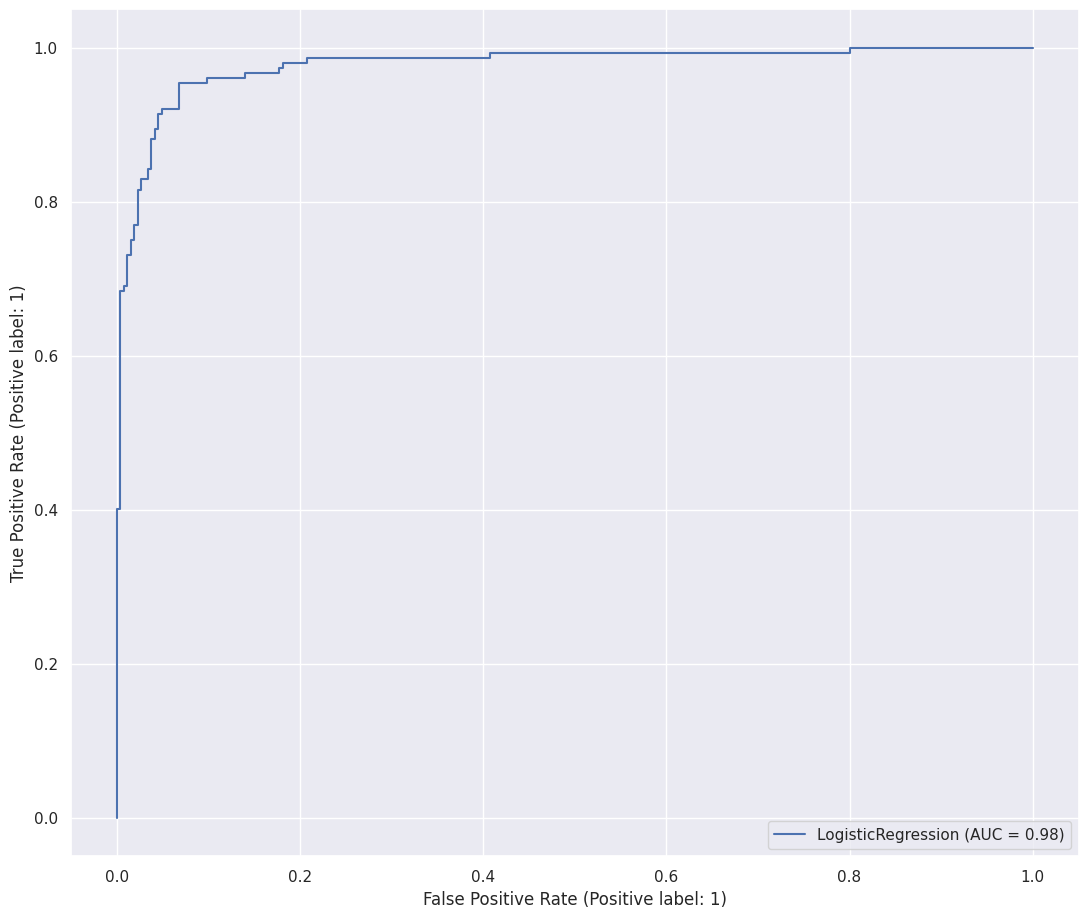

In [58]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr, dftest[mycolumns], dftest.Survived)

# Bonus question: do whatever you find useful

Here are some examples:

*   Try to include useful elements of the Cabin number
*   Try different regularization parameters
* Try L1 regularization instead of ridge
* Try linear regression





1. Trying out L1 Regularization (added Liblinear solver for compatibility)



In [62]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty='l1',C=1.0, solver='liblinear',max_iter=1000)

In [63]:
lr2.fit(df[mycolumns], df["Survived"])

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [64]:
lr2.predict(dftest[mycolumns].dropna())

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(lr2.predict(dftest[mycolumns]), dftest['Survived'])

0.947242206235012

In [66]:
lr2.predict_proba(dftest[mycolumns])[:,1]

array([0.09412768, 0.34545127, 0.09518164, 0.10216852, 0.5667461 ,
       0.15901305, 0.63432844, 0.19671568, 0.76185375, 0.07265014,
       0.10882017, 0.32904838, 0.93347888, 0.05861682, 0.83941445,
       0.85021794, 0.23261267, 0.16878097, 0.53549953, 0.52776667,
       0.27817943, 0.17289242, 0.9041768 , 0.65006483, 0.90279291,
       0.03300588, 0.96166009, 0.16074194, 0.37601574, 0.08586692,
       0.09364118, 0.17273659, 0.44559802, 0.52369255, 0.50403575,
       0.18288783, 0.63130823, 0.66833076, 0.10974346, 0.12116692,
       0.08633371, 0.39924725, 0.0617627 , 0.80841321, 0.84686759,
       0.10935959, 0.42181075, 0.13012132, 0.86495781, 0.49396346,
       0.47664663, 0.3252651 , 0.75569218, 0.8903056 , 0.30145009,
       0.06739072, 0.07678289, 0.10929269, 0.08277622, 0.96291792,
       0.14359287, 0.21802416, 0.13882552, 0.70322006, 0.66997772,
       0.81221788, 0.73475212, 0.3294952 , 0.55652376, 0.79159086,
       0.68672217, 0.12547569, 0.59560704, 0.57990972, 0.95963

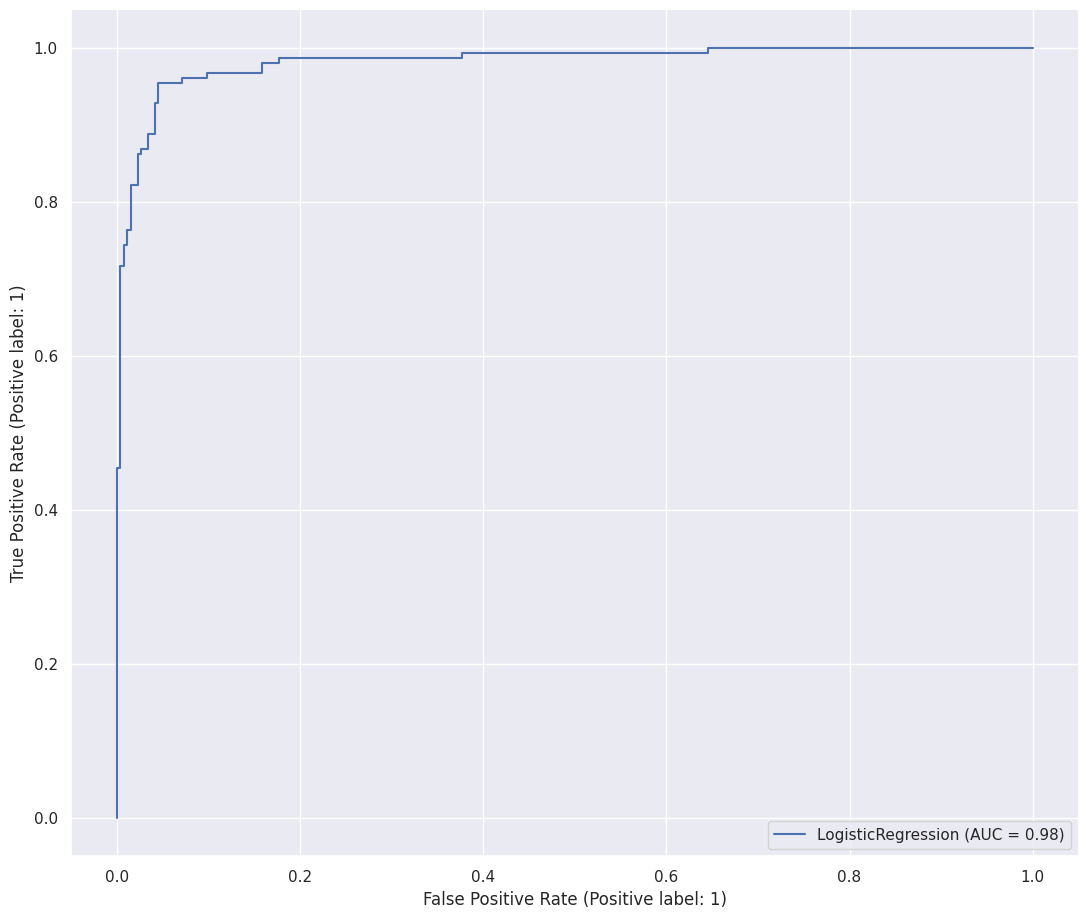

In [67]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr2, dftest[mycolumns], dftest.Survived)

With L1 regularization, we get a higher accuracy by a very small percentage ~ 1%

2. a) Trying out different C_values/regularization strengths with l2 regularizationto see if it improves the accuracy.

In [70]:
from sklearn.linear_model import LogisticRegression

for c_value in [0.1, 1, 10]:
    lrl = LogisticRegression(penalty='l2',C=c_value,max_iter=1000)
    lrl.fit(df[mycolumns], df["Survived"])
    accuracy = accuracy_score(lrl.predict(dftest[mycolumns]), dftest['Survived'])
    print(f"Accuracy for C={c_value}: {accuracy:.4f}")

Accuracy for C=0.1: 0.9233
Accuracy for C=1: 0.9329
Accuracy for C=10: 0.9353


As seen above, with l2 regularization, changing the regularization strengths does not affect the accuracy by much at all.

2. b) Trying out different C_values/regularization strengths with l1 regularization to see if it improves the accuracy.

In [69]:
from sklearn.linear_model import LogisticRegression

for c_value in [0.1, 1, 10]:
    lrl = LogisticRegression(penalty='l1',solver='liblinear',C=c_value,max_iter=1000)
    lrl.fit(df[mycolumns], df["Survived"])
    accuracy = accuracy_score(lrl.predict(dftest[mycolumns]), dftest['Survived'])
    print(f"Accuracy for C={c_value}: {accuracy:.4f}")

Accuracy for C=0.1: 0.9640
Accuracy for C=1: 0.9472
Accuracy for C=10: 0.9376


On the contrary, when we try different c_values with l1 regularization, there is a an improvement in accuracy, especially for a smaller c = 0.1, which is approx 2% greater.